In [81]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE

warnings.filterwarnings('ignore')
sbn.set(style='white')

In [82]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [83]:
cols = ['SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 'MAMA', 'FAMA', 'Price', 'Company ', 'ID', 'Date']

train_data.drop([c for c in train_data.columns if c not in cols], axis=1, inplace=True)
test_data.drop([c for c in test_data.columns if c not in cols], axis=1, inplace=True)

In [84]:
train_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Date,15-01-2148,15-01-2148,15-01-2148,16-01-2148,16-01-2148
Company,ABC,DEF,GHI,ABC,DEF
SMA,17.556,56.09,129.583,18.137,56.04
EMA,17.556,56.09,129.583,17.8985,56.71
WMA,18.316,55.2956,129.559,18.6585,55.9156
DEMA,NaN,NaN,NaN,NaN,NaN
TEMA,NaN,NaN,NaN,NaN,NaN
TRIMA,17.7347,55.5317,129.199,18.1427,55.0523
KAMA,NaN,NaN,NaN,19.2201,57.5121


In [85]:
train_abc = train_data.loc[train_data['Company ']=='ABC']
train_def = train_data.loc[train_data['Company ']=='DEF']
train_ghi = train_data.loc[train_data['Company ']=='GHI']

In [86]:
train_abc.head(10).T

,0,3,6,9,12,15,18,21,24,27
ID,1,4,7,10,13,16,19,22,25,28
Date,15-01-2148,16-01-2148,20-01-2148,21-01-2148,22-01-2148,23-01-2148,26-01-2148,27-01-2148,28-01-2148,29-01-2148
Company,ABC,ABC,ABC,ABC,ABC,ABC,ABC,ABC,ABC,ABC
SMA,17.556,18.137,18.393,18.674,18.662,18.855,18.987,19.162,19.219,19.126
EMA,17.556,17.8985,18.1097,18.2261,18.3105,18.5031,18.6735,18.7674,18.8442,18.8616
WMA,18.316,18.6585,18.8264,18.8913,18.8942,19.0229,19.1293,19.1662,19.1713,19.1205
DEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3482
TEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRIMA,17.7347,18.1427,18.455,18.7403,18.897,19.0243,19.0933,19.1227,19.1127,19.1067
KAMA,NaN,19.2201,19.2123,19.1857,19.1829,19.1949,19.2055,19.2044,19.2041,19.1868


In [87]:
train_abc.drop(['Company ', 'ID', 'Date'], axis=1, inplace=True)
train_def.drop(['Company ', 'ID', 'Date'], axis=1, inplace=True)
train_ghi.drop(['Company ', 'ID', 'Date'], axis=1, inplace=True)

In [88]:
test_abc = test_data.loc[test_data['Company ']=='ABC'].drop(['Company ', 'Date'], axis=1)
test_def = test_data.loc[test_data['Company ']=='DEF'].drop(['Company ', 'Date'], axis=1)
test_ghi = test_data.loc[test_data['Company ']=='GHI'].drop(['Company ', 'Date'], axis=1)

In [89]:
test_abc.head().T

,0,3,6,9,12
ID,12001.0000,12004.0000,12007.0000,12010.0000,12013.0000
SMA,551.2070,555.4630,559.7510,562.3342,563.6712
EMA,553.3926,555.2449,557.3822,558.2475,559.0843
WMA,559.2131,561.4627,563.5604,563.9950,564.0888
DEMA,567.0388,567.9254,569.5059,568.8749,568.4641
TEMA,570.5996,570.0487,570.7875,568.6992,567.2997
TRIMA,554.3346,558.9843,562.4413,564.1687,564.5868
KAMA,560.7553,561.3335,562.4989,562.4604,562.4824
FAMA,481.6439,481.7035,481.7664,481.8324,481.9014
MAMA,492.8442,493.5516,494.2861,494.9646,495.6435


In [90]:
def create_mean_MA(df):
    price = None
    ids = None
    try:
        price = df.pop('Price')
    except:
        x = 1+1 # Just to avoid indentation error in the next line
    try:
        ids = df.pop('ID')
    except:
        x = 1+1
    df['meanMA'] = df.mean(axis=1, skipna=True)
    if price is not None:
        df['Price'] = price
    if ids is not None:
        df['ID'] = ids
    return df

train_abc = create_mean_MA(train_abc)
train_def = create_mean_MA(train_def)
train_ghi = create_mean_MA(train_ghi)
test_abc = create_mean_MA(test_abc)
test_def = create_mean_MA(test_def)
test_ghi = create_mean_MA(test_ghi)

In [91]:
def create_diff_MA(df):
    price = None
    ids = None
    try:
        price = df.pop('Price')
    except:
        x = 1+1 # Just to avoid indentation error in the next line
    try:
        ids = df.pop('ID')
    except:
        x = 1+1
    df['maxDiff'] = df.max(axis=1, skipna=True) - df.min(axis=1, skipna=True)
    if price is not None:
        df['Price'] = price
    if ids is not None:
        df['ID'] = ids
    return df

train_abc = create_diff_MA(train_abc)
train_def = create_diff_MA(train_def)
train_ghi = create_diff_MA(train_ghi)
test_abc = create_diff_MA(test_abc)
test_def = create_diff_MA(test_def)
test_ghi = create_diff_MA(test_ghi)

In [92]:
train_abc.tail().T

,11982,11985,11988,11991,11994
SMA,525.7880,528.9300,532.261000,536.908000,542.250000
EMA,528.5054,533.8681,538.310200,543.253800,548.598600
WMA,528.6796,534.5363,539.876300,545.919800,552.418300
DEMA,534.5346,543.1887,549.570700,556.511700,563.818900
TEMA,538.3644,549.0151,555.924900,563.344800,571.015300
TRIMA,522.4903,525.2070,529.401600,535.108000,541.856000
KAMA,527.1978,533.2859,539.005000,549.427400,558.704000
FAMA,481.3580,481.3969,481.439100,481.484900,481.534500
MAMA,488.4487,489.1442,489.835800,490.592400,491.413000
meanMA,519.4852,524.2858,528.402733,533.616756,539.067622


In [93]:
train_abc = train_abc.fillna(0)
train_def = train_def.fillna(0)
train_ghi = train_ghi.fillna(0)

In [94]:
test_abc.head().T

,0,3,6,9,12
SMA,551.207000,555.463000,559.751000,562.334200,563.671200
EMA,553.392600,555.244900,557.382200,558.247500,559.084300
WMA,559.213100,561.462700,563.560400,563.995000,564.088800
DEMA,567.038800,567.925400,569.505900,568.874900,568.464100
TEMA,570.599600,570.048700,570.787500,568.699200,567.299700
TRIMA,554.334600,558.984300,562.441300,564.168700,564.586800
KAMA,560.755300,561.333500,562.498900,562.460400,562.482400
FAMA,481.643900,481.703500,481.766400,481.832400,481.901400
MAMA,492.844200,493.551600,494.286100,494.964600,495.643500
meanMA,543.447678,545.079733,546.886633,547.286322,547.469133


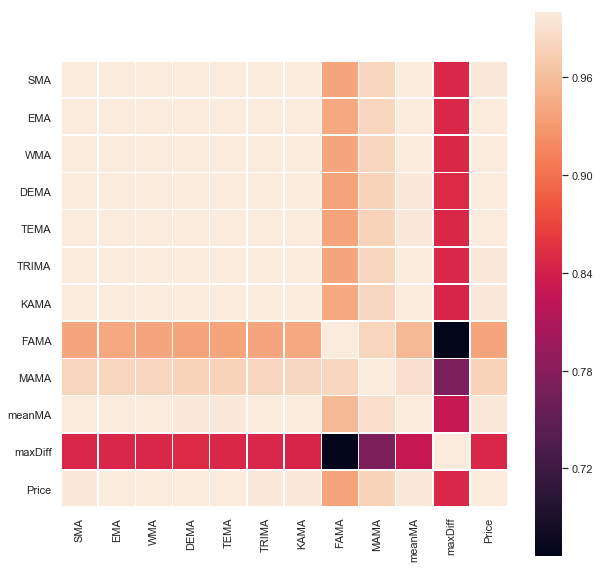

In [95]:
corr = train_abc.corr()
plt.figure(figsize=(10,10))
sbn.heatmap(corr, square=True, linewidth=0.5)

In [96]:
def build_model(df_tr, df_te, evaluate=False):
    df_train = df_tr.copy()
    df_test = df_te.copy()
    
    y = np.array(df_train.pop('Price'))
    ids = df_test.pop('ID')
    x = df_train.iloc[:,:].values
    x_pred = df_test.iloc[:,:].values
    
    if evaluate:
        x_train = x[:int(len(x)*0.9)]
        x_test = x[int(len(x)*0.9):]
        y_train = y[:int(len(y)*0.9)]
        y_test = y[int(len(y)*0.9):]
        model = LinearRegression().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error = mean_absolute_error(y_test, y_pred)
        return error
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x_pred)
    df_pred = pd.DataFrame({'ID': ids, 'Price': list(y_pred)})
    return df_pred

In [97]:
error_abc = build_model(train_abc, test_abc, evaluate=True)
error_def = build_model(train_def, test_def, evaluate=True)
error_ghi = build_model(train_ghi, test_ghi, evaluate=True)

print((error_abc+error_def+error_ghi)/3)

5.154147063111092


In [98]:
pred_abc = build_model(train_abc, test_abc)
pred_def = build_model(train_def, test_def)
pred_ghi = build_model(train_ghi, test_ghi)

pred = pd.concat([pred_abc, pred_def, pred_ghi])

In [99]:
pred = pred.sort_values(by='ID')

In [100]:
test_data['Price'] = pred['Price']

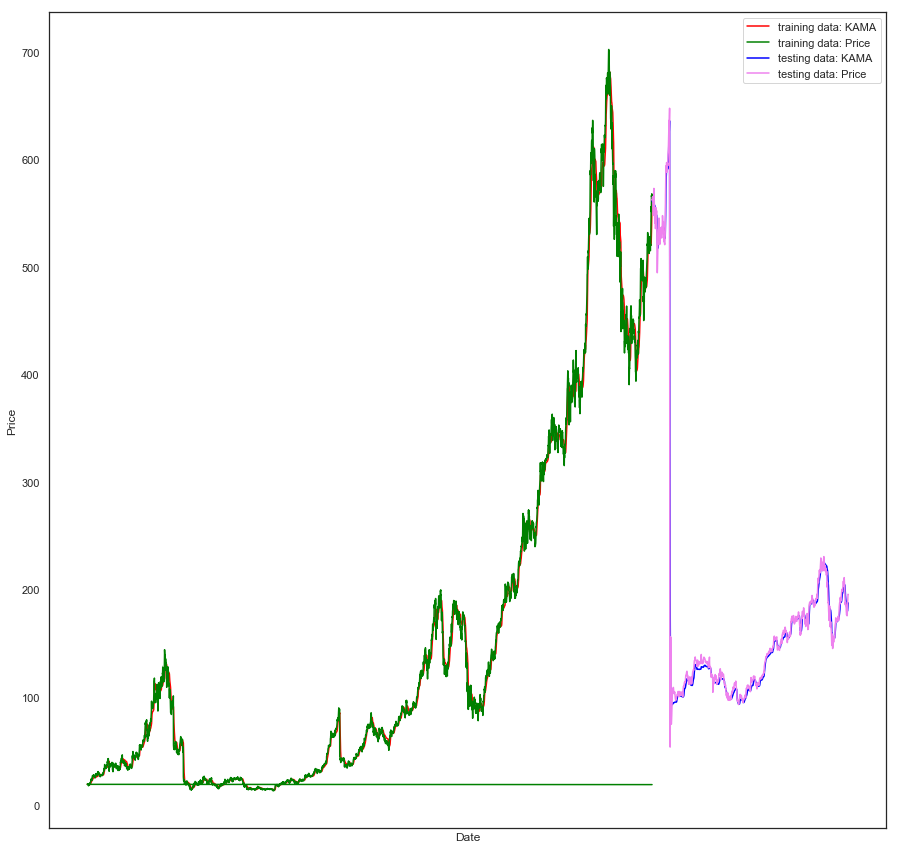

In [101]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='KAMA', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: KAMA', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: Price', color='green', sort=False)
sbn.lineplot(x='Date', y='KAMA', data=test_data.loc[test_data['Company ']=='ABC'], label='testing data: KAMA', color='blue', sort=False)
sbn.lineplot(x='Date', y='Price', data=test_data.loc[test_data['Company ']=='ABC'], label='testing data: Price', color='violet', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

This model performs poorly on validation than the previous one. Not gonna submit its output. Also the output of testing seems bad than the previous model near 100.

# Recursive Feature Selection on this data

In [102]:
def get_best_features(df_tr, num=6):
    df_train = df_tr.copy()
    
    y = np.array(df_train.pop('Price'))
    x = df_train.iloc[:,:].values
    
    model = LinearRegression()
    selector = RFE(model, num)
    selector = selector.fit(x,y)
    s = selector.support_
    cols = list(df_train.columns)
    features = [c for c in cols if s[cols.index(c)]==True]
    return features

In [103]:
def build_best_model(df_tr, evaluate=True):
    
    error = 10
    final_model = None
    final_features = None
    for i in range(5, 11):
        df_train = df_tr.copy()
        features = get_best_features(df_train, i)
        y = np.array(df_train.pop('Price'))
        cols = df_train.columns
        df_train.drop([c for c in cols if c not in features], axis=1, inplace=True)
        x = df_train.iloc[:,:].values
        if evaluate:
            x_train = x[:int(len(x)*0.9)]
            x_test = x[int(len(x)*0.9):]
            y_train = y[:int(len(y)*0.9)]
            y_test = y[int(len(y)*0.9):]
            model = LinearRegression().fit(x_train, y_train)
            y_pred = model.predict(x_test)
            e = mean_absolute_error(y_test, y_pred)
            if e<error:
                error = e
                model = LinearRegression().fit(x, y)
                final_model = model
                final_features = features
    return error, final_model, final_features

In [104]:
features_abc = get_best_features(train_abc)
features_def = get_best_features(train_def)
features_ghi = get_best_features(train_ghi)

In [105]:
features_abc

['SMA', 'EMA', 'WMA', 'TEMA', 'MAMA', 'meanMA']

In [106]:
error_abc, model_abc, features_abc = build_best_model(train_abc)
error_def, model_def, features_def = build_best_model(train_def)
error_ghi, model_ghi, features_ghi = build_best_model(train_ghi)

In [107]:
print((error_abc+error_def+error_ghi)/3)

5.020113329462059


Yup, 0.06 decrease in validation score as compared to the model without maxDiff feature submitted earlier. Not a good decrease but sufficient enough if it replicates in testing data would give a jump of 1-2 ranks.

In [108]:
def build_pred_file(df_te, model, features):
    df_test = df_te.copy()
    ids = df_test.pop('ID')
    cols = df_test.columns
    df_test.drop([c for c in cols if c not in features], axis=1, inplace=True)
    x_test = df_test.iloc[:,:].values
    y_pred = model.predict(x_test)
    df_pred = pd.DataFrame({'ID': ids, 'Price': list(y_pred)})
    return df_pred

In [109]:
pred_abc = build_pred_file(test_abc, model_abc, features_abc)
pred_def = build_pred_file(test_def, model_def, features_def)
pred_ghi = build_pred_file(test_ghi, model_ghi, features_ghi)

In [110]:
pred = pd.concat([pred_abc, pred_def, pred_ghi])
pred = pred.sort_values(by='ID')

In [112]:
test_data['Price'] = pred['Price']

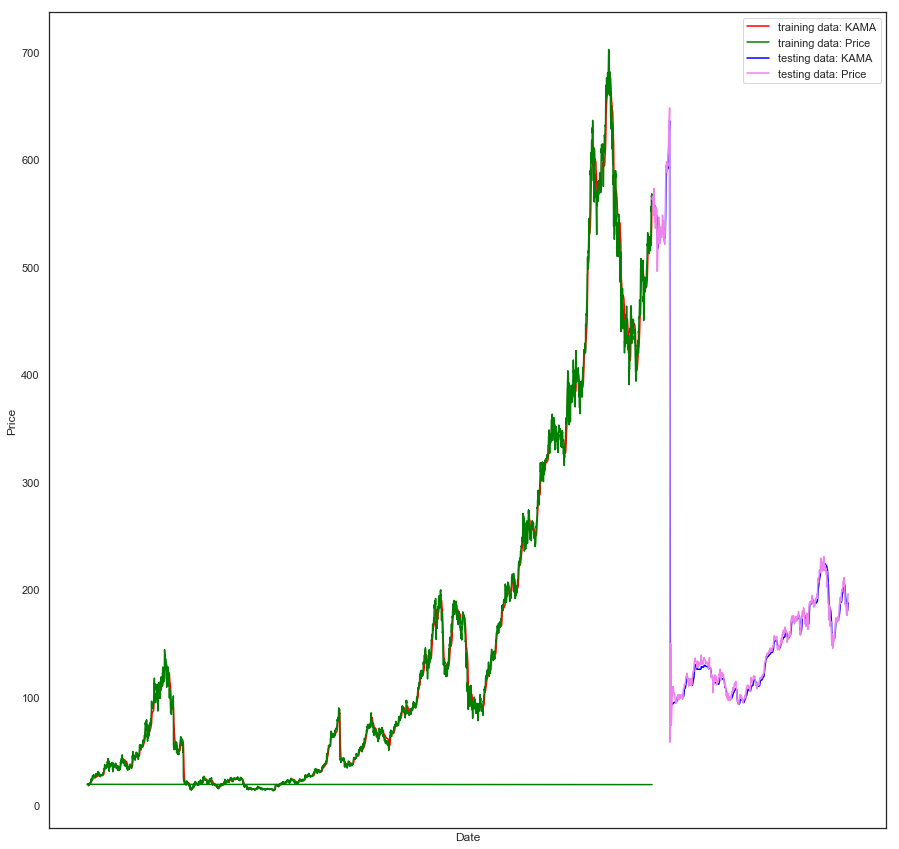

In [113]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='KAMA', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: KAMA', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: Price', color='green', sort=False)
sbn.lineplot(x='Date', y='KAMA', data=test_data.loc[test_data['Company ']=='ABC'], label='testing data: KAMA', color='blue', sort=False)
sbn.lineplot(x='Date', y='Price', data=test_data.loc[test_data['Company ']=='ABC'], label='testing data: Price', color='violet', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

In [114]:
pred.to_csv('All_MA_3_model_feature_elimination.csv', index=False)